# Analysis Challenge Assignment #2

**Author:** Nikita Tejwani

### Abstract
In the given dataset, there are a number of variables that are loosely correlated with on-task behaviour.  These were identified, through heatmap and logistic regression, to be 'Transitions/Durations', 'NumFORMATS', and 'Obsv/act'.  The three variables identify the number of transitions between activities, the duration of each activity, and the number of activity formats. A decision tree and k-neighbors classifier model were developed using the data from these three variables and the target variable 'ONTASK', indicating whether on-task behaviour was observed.  Ultimately, the models had a 67% and 63% accuracy, respectively.  Manipulation of the training data and the model hyperparameters were attempted to increase the accuracy of the models to about 70% but these techniques were unsuccessful.  Finally, the data was separated into two sets, on-task and off-task, and summary statistics were generated for each set.  There were no major differences between the two sets that could be perceptually identified.  As such, it was concluded that on-task behaviour cannot be well-predicted based on information provided in the existing dataset.

My conclusion from this analysis suggests that differences in student demographics, classroom activity types, and time spent on activity cannot produce major changes in student behaviour.  There are two alternate interpretations for this phenomenon: 1) teachers should not expect that they can develop activities that will significantly engage their students, or 2) on-task behaviours are not a good metric for engagement.  Personal experience leads me to believe the latter intepretation.  As a neurodivergent student, I have often had teachers attempt to re-engage me in a lesson in which I was already engaged.  My experience is evidence of the double empathy problem (Milton, 2012), which states that when people with different experiences of the world interact, behaviour and motivation is misunderstood by both parties.  Since on-task behaviour differs between neurotypes, it follows that labeling of on-task behaviour is subject to the double empathy problem.  Therefore, **predicting on-task behaviour without knowledge of student and observer neurotype is not probable.**

__________

### Reference

Milton, Damian. (2012). On the ontological status of autism: the ‘double empathy problem’. Disability & Society, 27(6). p. 883-887. ISSN 0968-7599.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Create dataframes for each dataset
test_df = pd.read_csv("aca2_dataset_validation.csv")
train_df = pd.read_csv("aca2_dataset_training.csv")

In [3]:
#Change the variable 'ONTASK' to a binary variable in which 1 means 'on task'
ontask_dummies = pd.get_dummies(train_df['ONTASK'])
train_df['ONTASK'] = ontask_dummies['Y']

ontask_dummies = pd.get_dummies(test_df['ONTASK'])
test_df['ONTASK'] = ontask_dummies['Y']

#Remove variables in the training dataset which have no bearing on the target (on/off task behaviour)
train_df.drop(['UNIQUEID', 'SCHOOL', 'CODER', 'STUDENTID'], axis = 1, inplace = True)

#Change activities to dummy variables
activities = pd.get_dummies(train_df['Activity'])
train_df = pd.concat([train_df, activities], axis = 1)
train_df.drop('Activity', axis = 1, inplace = True)

activities = pd.get_dummies(test_df['Activity'])
test_df = pd.concat([test_df, activities], axis = 1)
test_df.drop('Activity', axis = 1, inplace = True)

#Change class to dummy variables
class_ = pd.get_dummies(train_df['Class'])
train_df = pd.concat([train_df, class_], axis = 1)
train_df.drop('Class', axis = 1, inplace = True)

class_ = pd.get_dummies(test_df['Class'])
test_df = pd.concat([test_df, class_], axis = 1)
test_df.drop('Class', axis = 1, inplace = True)

<AxesSubplot:>

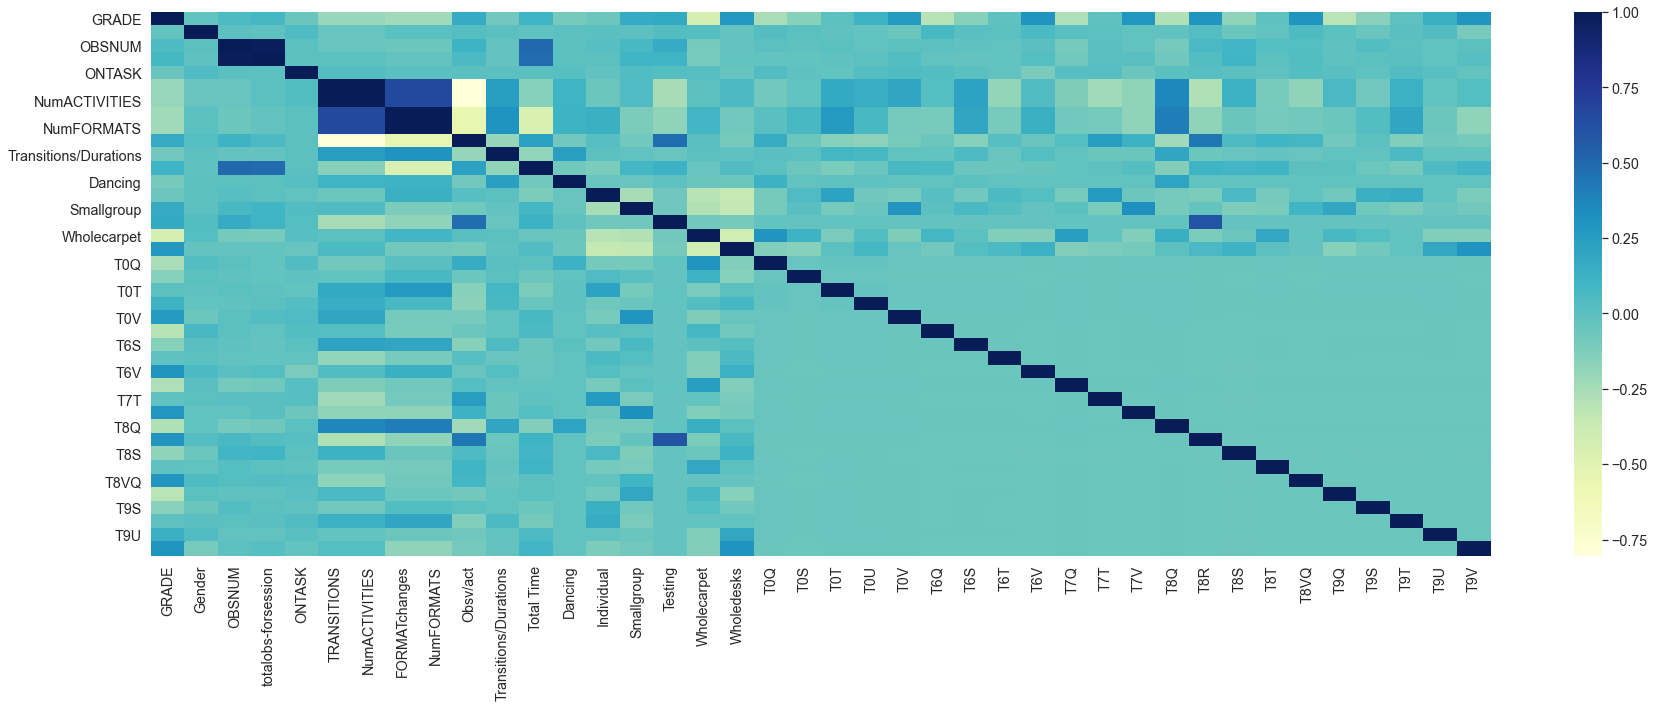

In [4]:
#There are some variables that have similar effects on the dependent variable.  A correlation heatmap can show these variables.
#Technique taken from: https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32

sns.set(rc = {'figure.figsize': (30, 10)}, font_scale = 1.3)
sns.heatmap(train_df.corr(), cmap = "YlGnBu")

In [5]:
#According to the heatmap, there are three pairs of variables with similar effects:
#OBSNUM & totalobs-forsession
#TRANSITIONS & NumACTIVITIES
#FORMATchanges & NumFORMATS
#Remove these variables: OBSNUM, TRANSITIONS, FORMATchanges

train_df.drop(['OBSNUM', 'TRANSITIONS', 'FORMATchanges'], axis = 1, inplace = True)

<AxesSubplot:>

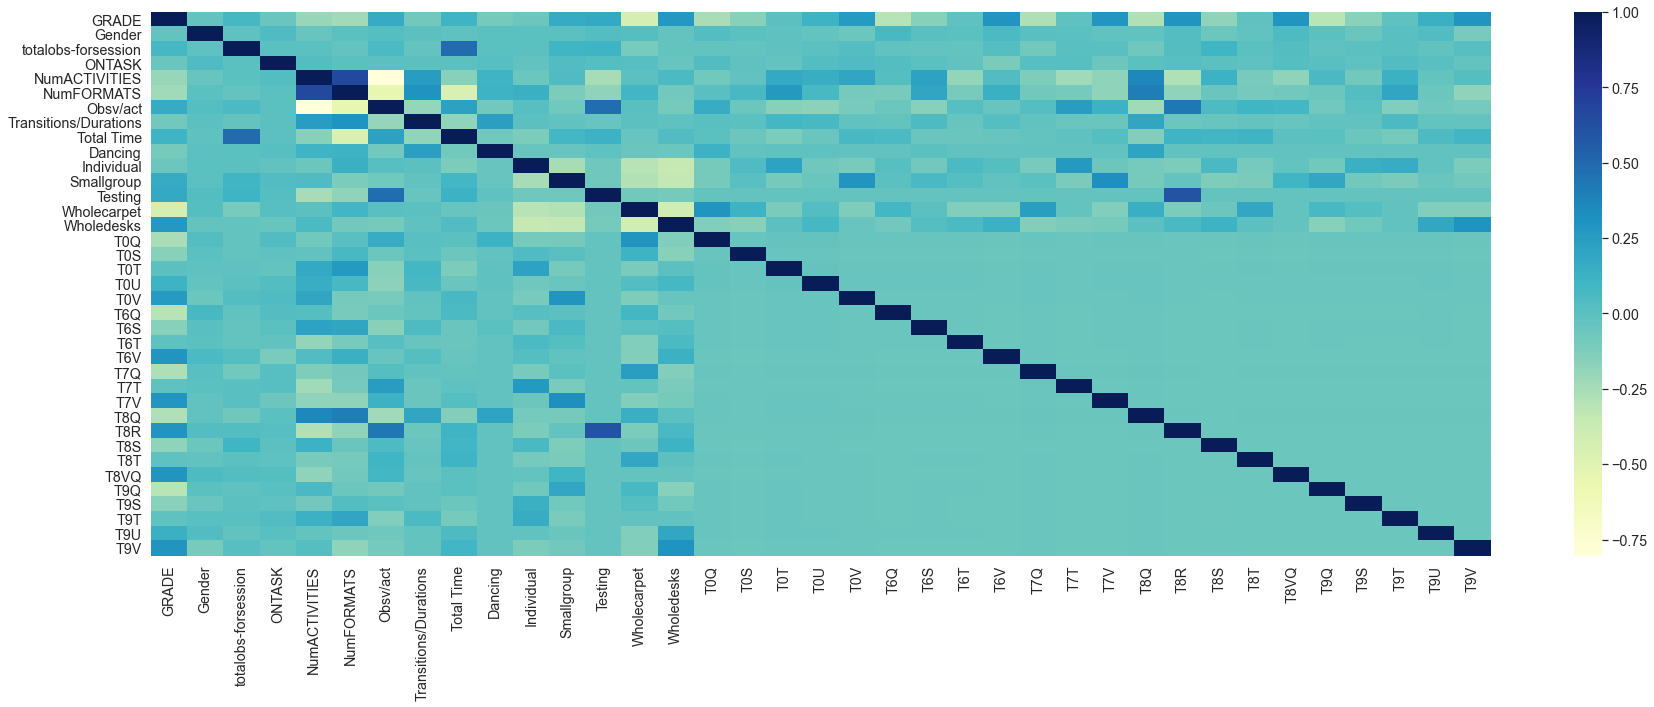

In [6]:
#Normalize the data so that the relative correlations of different variables can be compared
train_df_norm = train_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
sns.heatmap(train_df_norm.corr(), cmap = "YlGnBu")
#No variable has a linear correlation with on-task behaviour

In [7]:
#Use logistic regression to compare the relative effects of each activity type
activity_predictors = train_df_norm[['Dancing',
       'Individual', 'Smallgroup', 'Testing', 'Wholecarpet', 'Wholedesks']].to_numpy()
target = train_df_norm['ONTASK'].values.reshape(-1, 1)
logit = sm.Logit(target, activity_predictors)
logit_fit = logit.fit()
print(logit_fit.summary())

#Conclusion: these variables do not seem to have vastly different effects on the dependent variable

Optimization terminated successfully.
         Current function value: 0.629920
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22184
Model:                          Logit   Df Residuals:                    22178
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                0.002924
Time:                        11:50:46   Log-Likelihood:                -13974.
converged:                       True   LL-Null:                       -14015.
Covariance Type:            nonrobust   LLR p-value:                 3.258e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2528      0.222      5.634      0.000       0.817       1.689
x2             0.6411      0.

In [8]:
#Use logistic regression to compare the relative effects of each transition variable
transition_predictors = train_df_norm[['Obsv/act', 'Transitions/Durations', 'Total Time']].to_numpy()
logit = sm.Logit(target, transition_predictors)
logit_fit = logit.fit()
print(logit_fit.summary())

#The variable 'Transitions/Durations' appears to have a strong logistic effect on the variable 'ontask'

Optimization terminated successfully.
         Current function value: 0.644921
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22184
Model:                          Logit   Df Residuals:                    22181
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                -0.02082
Time:                        11:50:46   Log-Likelihood:                -14307.
converged:                       True   LL-Null:                       -14015.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0943      0.065     16.718      0.000       0.966       1.223
x2            24.4923      1.

In [9]:
#Use logistic regression to compare the relative effects of each demographic variable
transition_predictors = train_df_norm[['GRADE', 'Gender']].to_numpy()
logit = sm.Logit(target, transition_predictors)
logit_fit = logit.fit()
print(logit_fit.summary())

#Neither grade nor gender has a strong correlation with 'ontask'

Optimization terminated successfully.
         Current function value: 0.646701
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22184
Model:                          Logit   Df Residuals:                    22182
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                -0.02364
Time:                        11:50:46   Log-Likelihood:                -14346.
converged:                       True   LL-Null:                       -14015.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4685      0.027     17.611      0.000       0.416       0.521
x2             0.5901      0.

In [10]:
#Use logistic regression to estimate the effect of 'NumFORMATS'
format_predictors = train_df_norm[['NumFORMATS']].to_numpy()
logit = sm.Logit(target, format_predictors)
logit_fit = logit.fit()
print(logit_fit.summary())

#'NumFORMATS' has a significant coefficient - will be included in analysis

Optimization terminated successfully.
         Current function value: 0.654189
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                22184
Model:                          Logit   Df Residuals:                    22183
Method:                           MLE   Df Model:                            0
Date:                Fri, 22 Oct 2021   Pseudo R-squ.:                -0.03549
Time:                        11:50:46   Log-Likelihood:                -14513.
converged:                       True   LL-Null:                       -14015.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5031      0.038     39.345      0.000       1.428       1.578


In [11]:
#First, remove outliers in 'Transitions/Durations', 'NumFORMATS', and 'Obsv/act' columns
#Removal of outliers will limit their effect on the decision tree
mask = train_df['Transitions/Durations'].mean() + 3*train_df['Transitions/Durations'].std()
train_df.drop(train_df[train_df['Transitions/Durations'] > mask].index, axis = 0, inplace = True)

mask = train_df['NumFORMATS'].mean() + 3*train_df['NumFORMATS'].std()
train_df.drop(train_df[train_df['NumFORMATS'] > mask].index, axis = 0, inplace = True)

mask = train_df['Obsv/act'].mean() + 3*train_df['Obsv/act'].std()
train_df.drop(train_df[train_df['Obsv/act'] > mask].index, axis = 0, inplace = True)

mask = train_df['Total Time'].mean() + 3*train_df['Total Time'].std()
train_df.drop(train_df[train_df['Total Time'] > mask].index, axis = 0, inplace = True)


predictors = train_df[['Transitions/Durations', 'NumFORMATS', 'Obsv/act',
       'T6V', 'T7V']].to_numpy()
target = train_df['ONTASK'].values.reshape(-1, 1)

In [12]:
#A decision tree is formed with the training data
decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(predictors, target)

#The decision tree model is tested for accuracy
predictors_test = test_df[['Transitions/Durations', 'NumFORMATS', 'Obsv/act', 'T6V', 'T7V']].to_numpy()
target_test = test_df['ONTASK'].values.reshape(-1,1)
tree_predictions = decision_tree.predict(predictors_test)
print(confusion_matrix(target_test, tree_predictions))
print(accuracy_score(target_test, tree_predictions))

#The resulting accuracy score of 0.67 suggests that the model is not very good at predicting on-task behaviour.

[[ 189 1660]
 [ 152 3546]]
0.6733369388858843


In [13]:
#Create k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(predictors, target)
knn_predictions = knn.predict(predictors_test)
print(confusion_matrix(target_test, knn_predictions))
print(accuracy_score(target_test, knn_predictions))

<ipython-input-13-4da55a252d21>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(predictors, target)


[[ 429 1420]
 [ 654 3044]]
0.6261042004687218


In [14]:
#The data does not seem to have strong predictor variables.  This can be confirmed through a summary analysis
#The data is split into two sets - one with ONTASK = 1, one with ONTASK = 0
#Summary statistics do not reveal significant differences between the two sets
pd.set_option("display.max_rows", None, "display.max_columns", None)

train_df[train_df['ONTASK'] == 1].describe()

,GRADE,Gender,totalobs-forsession,ONTASK,NumACTIVITIES,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,Dancing,Individual,Smallgroup,Testing,Wholecarpet,Wholedesks,T0Q,T0S,T0T,T0U,T0V,T6Q,T6S,T6T,T6V,T7Q,T7T,T7V,T8Q,T8R,T8S,T8T,T8VQ,T9Q,T9S,T9T,T9U,T9V
count,14139.000000,14139.000000,14139.000000,14139.0,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.00000,14139.000000,14139.000000,14139.0,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000,14139.000000
mean,1.998020,0.519131,167.058986,1.0,3.475069,2.601386,917.061244,0.002945,724.604710,0.00389,0.210552,0.212957,0.0,0.254191,0.318410,0.025532,0.045265,0.032039,0.038404,0.049438,0.051418,0.046184,0.045477,0.036424,0.042011,0.054813,0.041446,0.040243,0.033595,0.057642,0.046255,0.057359,0.051842,0.050074,0.057147,0.050428,0.046962
std,1.480957,0.499652,104.296827,0.0,1.260126,1.214084,353.834781,0.003991,603.057487,0.06225,0.407715,0.409412,0.0,0.435421,0.465876,0.157741,0.207892,0.176110,0.192177,0.216788,0.220857,0.209891,0.208355,0.187350,0.200622,0.227623,0.199326,0.196536,0.180191,0.233073,0.210044,0.232536,0.221717,0.218106,0.232131,0.218834,0.211566
min,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,387.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,79.000000,1.0,3.000000,2.000000,717.250000,0.000861,244.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,161.000000,1.0,3.000000,2.000000,826.000000,0.001540,556.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,243.000000,1.0,4.000000,3.000000,1102.666667,0.003407,1057.000000,0.00000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,479.000000,1.0,7.000000,6.000000,2181.000000,0.032051,2717.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
train_df[train_df['ONTASK'] == 0].describe()

,GRADE,Gender,totalobs-forsession,ONTASK,NumACTIVITIES,NumFORMATS,Obsv/act,Transitions/Durations,Total Time,Dancing,Individual,Smallgroup,Testing,Wholecarpet,Wholedesks,T0Q,T0S,T0T,T0U,T0V,T6Q,T6S,T6T,T6V,T7Q,T7T,T7V,T8Q,T8R,T8S,T8T,T8VQ,T9Q,T9S,T9T,T9U,T9V
count,6956.000000,6956.000000,6956.000000,6956.0,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.0,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000
mean,2.163887,0.473836,167.397499,0.0,3.359258,2.564980,943.106749,0.002733,743.021852,0.001725,0.225417,0.178407,0.0,0.238355,0.356095,0.014807,0.048304,0.040828,0.026164,0.030046,0.037665,0.043272,0.052473,0.089419,0.035221,0.045428,0.068286,0.038528,0.031484,0.059948,0.048447,0.043847,0.047585,0.054198,0.038384,0.046435,0.059229
std,1.495412,0.499351,102.393623,0.0,1.240997,1.183862,357.782696,0.003560,600.277952,0.041502,0.417887,0.382883,0.0,0.426108,0.478878,0.120790,0.214422,0.197906,0.159636,0.170726,0.190399,0.203483,0.222994,0.285368,0.184352,0.208257,0.252255,0.192481,0.174633,0.237408,0.214725,0.204769,0.212901,0.226424,0.192136,0.210440,0.236071
min,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,387.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,83.000000,0.0,3.000000,2.000000,730.200000,0.000850,257.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,163.000000,0.0,3.000000,2.000000,882.500000,0.001540,592.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,242.000000,0.0,4.000000,3.000000,1106.750000,0.003268,1080.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,478.000000,0.0,7.000000,6.000000,2181.000000,0.032051,2716.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
